# MA770 Mathematical and Statistical Methods of Bioinformatics
# Problem Set 8
### Cheng, Wanli U31865818

# Support Vector Machine

In [5]:
# Load modules we'll need.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

<b>Generate the Training Set</b>

In [6]:
# Generate the Random Matrix X
XTrain=10*np.random.random((50,50))-5

# Define the labels y
def y(x):
    if np.sum(x) >= 0:
        return 1
    else:
        return -1
    
# Create the data Label set Y
def Y(X):
    (M,N)=np.shape(X)
    Y=np.zeros(M)
    for m in range(M):
        Y[m]=Y[m]+[y(X[m])]
    return Y

YTrain=Y(XTrain)

## (a) Train the SVM Classifer

In [7]:
clf = svm.SVC(kernel='linear')
clf.fit(XTrain,YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## (b) Explain SVM

Given a hyperplane $\mathbb{R}^{n-1}$ trained by the SVM in feature space $\mathbb{R}^n$, the feature space is divided into two half hyperplanes $\mathcal{H}_+^n$ and $\mathcal{H}_-^n$. Then the classification rule is:
$$
y(\mathbf{x})=
\begin{cases}
+1\quad\text{if}\quad \mathbf{x}\in\mathcal{H}_+^n\\
-1\quad\text{if}\quad \mathbf{x}\in\mathcal{H}_-^n
\end{cases}
$$
for all $\mathbf{x}\in\mathbb{R}^n$.

In the $2\times2$ case, our feature space is $[-5,5]^2\subset\mathbb{R}^2$.

Thus, the hyperplane that separatet the two labels is a line $l\in\mathbb{R}^2$ such that $l\cap[-5,5]^2\ne\emptyset$.

By hypothesis, $\forall\mathbf{x}=(x_1,x_2)\in[-5,5]^2$, we have
$$
y(\mathbf{x})=
\begin{cases}
+1\quad\text{if}\quad x_1+x_2\ge0\\
-1\quad\text{if}\quad x_1+x_2<0
\end{cases}
$$
which implies that the points with different $y$ values are separated by the solution of the linear equation:
$$
x_1+x_2=0.
$$

Therefore, the hyperplane we are looking for is the principle diagonal of the grid $[-5,5]^2$.

## (c) Test the SVM

<b> Generate the Testing Set </b>

In [8]:
XTest=10*np.random.random((50,50))-5

In [9]:
clf.predict(XTest)

array([-1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.])

In [10]:
clf.predict(XTest)-Y(XTest)

array([-2., -2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.])

The accuracy of the classifier is around 0.5.

## (d) Confusion Matrix

In [11]:
def CfM(X,classifier):
    TP=0
    FP=0
    TN=0
    FN=0
    (M,N)=np.shape(X)
    for m in range(M):
        if classifier.predict(X)[m] == Y(X)[m]:
            if classifier.predict(X)[m] == 1:
                TP=TP+1
            else:
                TN=TN+1
        else:
            if classifier.predict(X)[m] == 1:
                FP=FP+1
            else:
                FN=FN+1
    return np.array([[TP,FP],[TN,FN]])

In [12]:
CfM(XTest,clf)

array([[18,  9],
       [20,  3]])

## (e) Measure the Accuracy

In [13]:
def Accuracy(X,classifier):
    (M,N)=np.shape(X)
    A=1-np.linalg.norm((1/2)*(classifier.predict(X)-Y(X)),1)/M
    return A

In [14]:
Accuracy(XTest,clf)

0.76

## （f） Size of Training Set

Here we experiment the SVM classifier with trianing set of different sizes.

In [29]:
XTrainRed10=10*np.random.random((1024,50))-5
XTrainRed9=10*np.random.random((512,50))-5
XTrainRed8=10*np.random.random((256,50))-5
XTrainRed7=10*np.random.random((128,50))-5
XTrainRed6=10*np.random.random((64,50))-5
XTrainRed5=10*np.random.random((32,50))-5
XTrainRed4=10*np.random.random((16,50))-5
XTrainRed3=10*np.random.random((8,50))-5
XTrainRed2=10*np.random.random((4,50))-5
XTrainRed1=10*np.random.random((2,50))-5

In [30]:
clf10 = svm.SVC(kernel='linear')
clf10.fit(XTrainRed10,Y(XTrainRed10))

clf9 = svm.SVC(kernel='linear')
clf9.fit(XTrainRed9,Y(XTrainRed9))

clf8 = svm.SVC(kernel='linear')
clf8.fit(XTrainRed8,Y(XTrainRed8))

clf7 = svm.SVC(kernel='linear')
clf7.fit(XTrainRed7,Y(XTrainRed7))

clf6 = svm.SVC(kernel='linear')
clf6.fit(XTrainRed6,Y(XTrainRed6))

clf5 = svm.SVC(kernel='linear')
clf5.fit(XTrainRed5,Y(XTrainRed5))

clf4 = svm.SVC(kernel='linear')
clf4.fit(XTrainRed4,Y(XTrainRed4))

clf3 = svm.SVC(kernel='linear')
clf3.fit(XTrainRed3,Y(XTrainRed3))

clf2 = svm.SVC(kernel='linear')
clf2.fit(XTrainRed2,Y(XTrainRed2))

clf1 = svm.SVC(kernel='linear')
clf1.fit(XTrainRed1,Y(XTrainRed1))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
def AccuracyList(X):
    return np.array([Accuracy(X,clf1),Accuracy(X,clf2),Accuracy(X,clf3),Accuracy(X,clf4),Accuracy(X,clf5),
                    Accuracy(X,clf6),Accuracy(X,clf7),Accuracy(X,clf8),Accuracy(X,clf9),Accuracy(X,clf10)])

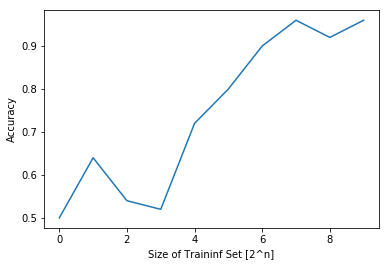

In [34]:
plt.plot(AccuracyList(10*np.random.random((50,50))-5))
plt.ylabel('Accuracy')
plt.xlabel('Size of Traininf Set [2^n]');

The above graph shows the growth of accuracy with respect to the growth in size of training set.

We can see that the growth of the prediction accuracy is not monotonic, which implies that when we have few datapoints, e.g., less than twenty, then sometimes 8 data points can produce a better guess than 16 data points. In other words, the prediction accuracy is not stable when we have very few training data.

And the overall trends indicated that the bigger the training set, the better our prediction we can make, especially when we have a training set with more data points than the number of features.

Another crucial thing is that SVM classifier need at least a positive sample and a negative sample to simulate the hyperspace we need, when the data set is too small (compare to the number of labels), it is highly possible that the SVM classifier cannot properly find a model. E.g., in this particular example, we have two labels, therefore, for we only have 2 or 4 datapoints, there is 50% or 12.5% probability that we cannot properly generate a model.